In [256]:
import numpy as np
import matplotlib.pyplot as plt

In [257]:
data_1 = np.random.normal((0,0), 0.6, size=(150, 2))
data_1[:5]

array([[-1.01474597,  0.29015123],
       [ 0.26036959, -0.29556721],
       [ 0.90110028,  0.75014353],
       [-0.8375505 , -0.74500347],
       [ 0.23513817, -0.46439936]])

In [258]:
data_2 = np.random.normal((2,1), 0.2, size=(25, 2))
data_2[:5]

array([[1.97304225, 0.75099666],
       [2.30359565, 1.18067138],
       [2.06253917, 0.8709941 ],
       [1.83416008, 0.95395436],
       [2.00382636, 1.10430248]])

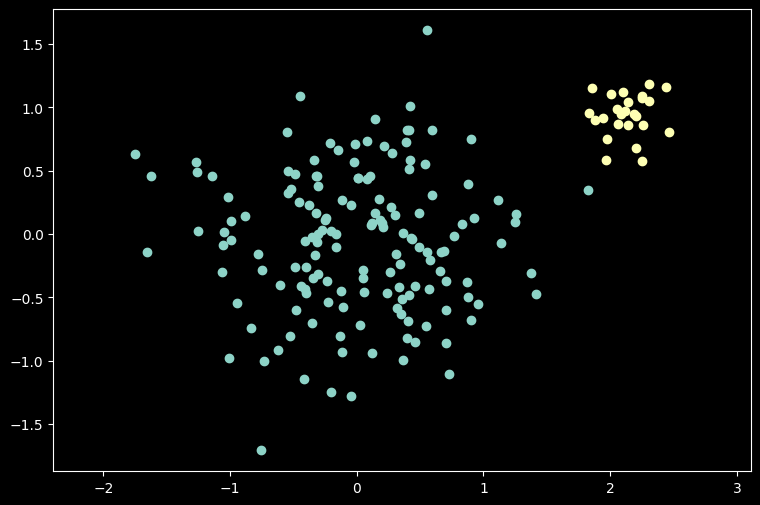

In [259]:
plt.figure(figsize=(9,6))
plt.style.use('dark_background')
plt.axis('equal')

plt.scatter(*data_1.T)
plt.scatter(*data_2.T)
plt.show()

In [260]:
data = np.vstack([data_1, data_2])
membership = np.random.choice([1,2,3], size=len(data))
clusters = {1:None, 2:None, 3: None}
cluster_weight = {c:1 for c in clusters}
membership

array([2, 3, 1, 3, 3, 2, 2, 1, 2, 3, 3, 2, 2, 1, 2, 1, 2, 3, 1, 2, 1, 2,
       1, 1, 3, 1, 1, 2, 2, 1, 1, 1, 1, 3, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1,
       3, 2, 3, 1, 1, 3, 3, 2, 1, 1, 3, 2, 2, 2, 1, 3, 1, 2, 2, 3, 1, 1,
       1, 2, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 1, 3, 1, 3, 1, 2, 3, 3, 1, 1, 1, 2,
       3, 1, 1, 2, 3, 3, 2, 3, 3, 1, 2, 1, 2, 3, 1, 2, 1, 1, 3, 1, 2, 1,
       3, 2, 1, 2, 3, 1, 1, 3, 1, 2, 3, 3, 3, 2, 3, 3, 1, 1, 2, 3, 2, 3,
       2, 3, 3, 3, 1, 3, 2, 3, 3, 2, 3, 1, 3, 1, 2, 3, 2, 2, 2, 1, 3])

In [261]:
def update_clusters(data, membership, clusters):
    clu = {}
    for c in clusters:
        # print(c)
        members = [v for v,m in zip(data, membership) if m==c]
        if members:
            clu[c] = np.array(members).mean(axis=0)
    return clu

In [262]:
clusters = update_clusters(data, membership, clusters)
clusters

{1: array([0.09997682, 0.0889291 ]),
 2: array([0.3716046 , 0.04527353]),
 3: array([0.46395416, 0.11101964])}

In [263]:
def show(data, membership, clusters):
    plt.figure(figsize=(9,6))
    plt.style.use('dark_background')
    plt.axis('equal')
    
    for c in clusters:
        plt.scatter(*np.array([v for v,m in zip(data, membership) if m==c]).T)
        x,y = clusters[c]
        plt.plot(x, y, 'ro')
        
    plt.show()

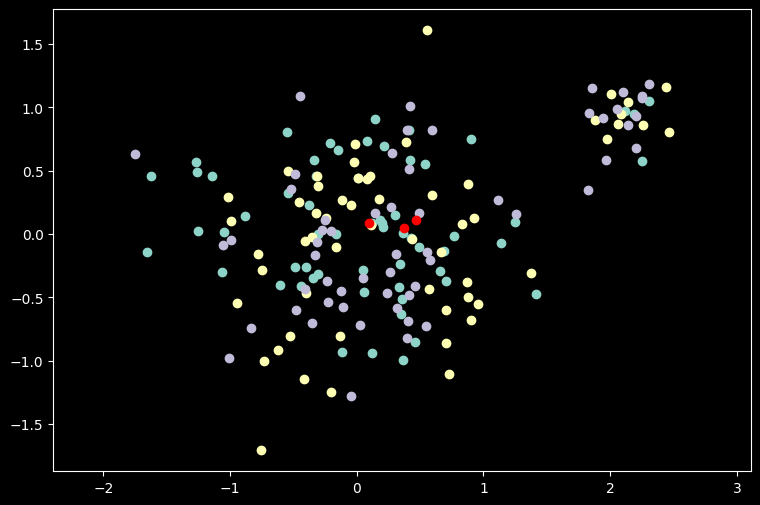

In [264]:
show(data, membership, clusters)

In [265]:
def update_membership(data, membership, clusters, cluster_weight):
    for i in range(len(data)):
        f_max = 0
        membership[i] = 0
        
        for c in clusters:
            d = np.linalg.norm(data[i] - clusters[c]) + 0.0001
            f = cluster_weight[c] / d**2
            if f > f_max:
                f_max = f
                membership[i] = c
            

In [266]:
def update_cluster_weight(membership, clusters, cluster_weight):
    cluster_weight = {}
    for c in clusters:
        w = sum(1 for m in membership if m==c)
        if w > 2:
            cluster_weight[c] = w**1.2
        else:
            cluster_weight[c] = 0
    return cluster_weight
    

In [267]:
update_membership(data, membership, clusters, cluster_weight)
cluster_weight = update_cluster_weight(membership, clusters, cluster_weight)

In [268]:
membership

array([1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 2, 1, 1, 3,
       1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1, 1, 1, 3, 1,
       3, 1, 3, 1, 1, 3, 3, 2, 1, 2, 1, 3, 3, 3, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 2, 3, 1,
       3, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 3, 3,
       1, 1, 1, 1, 3, 3, 1, 2, 2, 3, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1, 2, 3,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 2, 1, 3, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [269]:
cluster_weight

{1: 221.35585372644266, 2: 61.60756339459819, 3: 119.91472388583766}

{1: 263.29342086486054, 2: 66.40743836382342, 3: 78.65753205510133}
{1: 293.9583639445171, 2: 66.40743836382342, 3: 54.52424211444941}
{1: 322.02243803234467, 2: 49.88477498225796, 3: 49.88477498225796}
{1: 356.88291540784064, 2: 25.78157891381218, 3: 49.88477498225796}
{1: 382.60092287644983, 2: 10.330412131161864, 3: 49.88477498225796}
{1: 402.08146949316864, 2: 0, 3: 49.88477498225796}
{1: 405.34378834292806, 2: 0, 3: 49.88477498225796}
{1: 405.34378834292806, 3: 49.88477498225796}
{1: 405.34378834292806, 3: 49.88477498225796}
{1: 405.34378834292806, 3: 49.88477498225796}


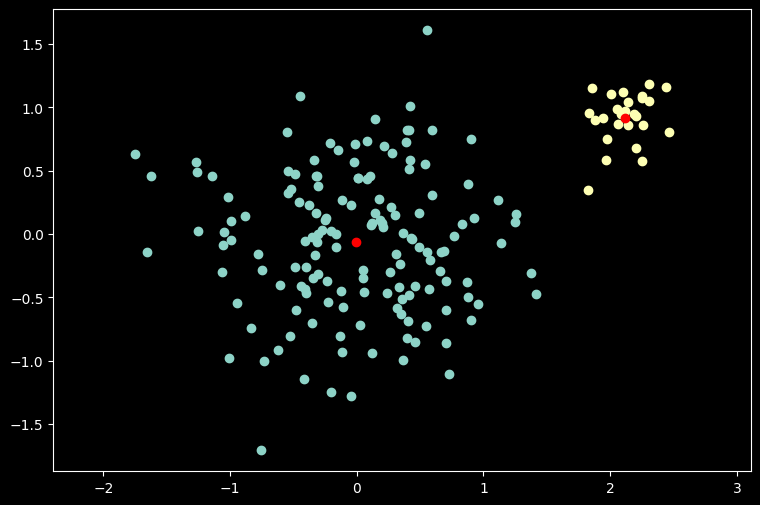

In [270]:
for _ in range(10):
    clusters = update_clusters(data, membership, clusters)
    update_membership(data, membership, clusters, cluster_weight)
    cluster_weight = update_cluster_weight(membership, clusters, cluster_weight)
    print(cluster_weight)

show(data, membership, clusters)